# Total SWE bar plots
Building from the manuscript table 3, let's make some bar plots to really highlight the results 

env: running with **raster** right now since I do not need rioxarray

In [1]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns 

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime
import datetime as datetime

import csv 
import copy 
import os.path 

from mpl_toolkits.axes_grid1 import make_axes_locatable

import pickle

In [2]:
sns.set_style("whitegrid")

Set up the pandas dataframe with the data 

In [10]:
# create pandas dataframe
data_swe_31 = [{'entire area as control': 34.4, 
            'entire area as it is': 92.3,
            'entire area as control with high heat index': 18.9,
            'entire area as control with low heat index': 13.8,
            'entire area as it is with high heat index': 18.9,
            'entire area as it is with low heat index': 21.6,}]

data_swe_34 = [{'entire area as control': 34.5, 
            'entire area as it is': 91.2,
            'entire area as control with high heat index': 20.7,
            'entire area as control with low heat index': 12.9,
            'entire area as it is with high heat index': 20.7,
            'entire area as it is with low heat index': 20.2,}]

df31= pd.DataFrame(data_swe_31)
df34= pd.DataFrame(data_swe_34)

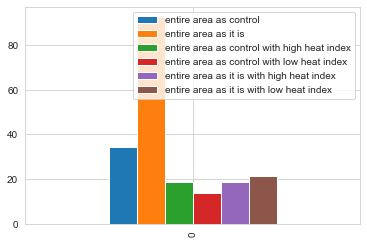

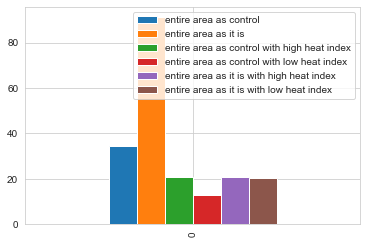

In [13]:
df1.plot.bar()
plt.show()
df2.plot.bar()
plt.show()

In [14]:
# create pandas dataframe
data_swe_entire_area = [{'entire area as control with density calc 1': 34.4, 
                         'entire area as it is with density calc 1': 92.3,
                         'entire area as control with density calc 2': 34.5, 
                         'entire area as it is with density calc 2': 91.2,}]

data_swe_heat_index = [{
                        'entire area as control with high heat index with density calc 1': 18.9,
                        'entire area as control with low heat index with density calc 1': 13.8,
                        'entire area as it is with high heat index with density calc 1': 18.9,
                        'entire area as it is with low heat index with density calc 1': 21.6,
                        'entire area as control with high heat index with density calc 2': 20.7,
                        'entire area as control with low heat index with density calc 2': 12.9,
                        'entire area as it is with high heat index with density calc 2': 20.7,
                        'entire area as it is with low heat index with density calc 2': 20.2,}]

df_full= pd.DataFrame(data_swe_entire_area)
df_sets= pd.DataFrame(data_swe_heat_index)

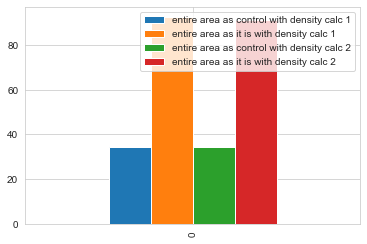

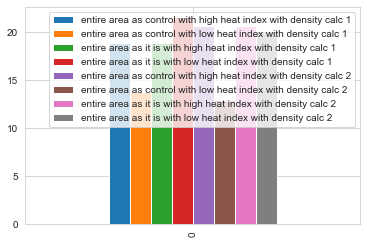

In [16]:
df_full.plot.bar()
plt.show()
df_sets.plot.bar()
plt.show()

Now, make these plots pretty with seaborn bar plots or plotly?

In [23]:
# create pandas dataframe
data_swe_entire_area = [{'entire area\nas all control\n density calc 1': 34.4, 
                         'entire area\nwith treatments\ndensity calc 1': 92.3,
                         'entire area\nas all control\n density calc 2': 34.5, 
                         'entire area\nwith treatments\ndensity calc 2': 91.2,}]

data_swe_heat_index = [{
                        'entire area\nas all control\n high heat index\ndensity calc 1': 18.9,
                        'entire area\nas all control\n low heat index\n density calc 1': 13.8,
                        'entire area\nwith treatments\nhigh heat index\ndensity calc 1': 18.9,
                        'entire area\nwith treatments\nlow heat index\n density calc 1': 21.6,
                        'entire area\nas all control\n high heat index\ndensity calc 2': 20.7,
                        'entire area\nas all control\n low heat index\n density calc 2': 12.9,
                        'entire area\nwith treatments\nhigh heat index\ndensity calc 2': 20.7,
                        'entire area\nwith treatments\nlow heat index\n density calc 2': 20.2,}]

df_full= pd.DataFrame(data_swe_entire_area)
df_sets= pd.DataFrame(data_swe_heat_index)

In [24]:
df_full

,entire area\nas all control\n density calc 1,entire area\nwith treatments\ndensity calc 1,entire area\nas all control\n density calc 2,entire area\nwith treatments\ndensity calc 2
0,34.4,92.3,34.5,91.2


<AxesSubplot:>

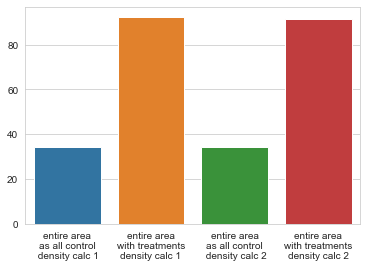

In [25]:
sns.barplot(data=df_full)

<AxesSubplot:>

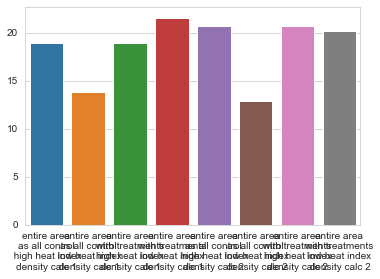

In [26]:
sns.barplot(data=df_sets)

Create a similar dataframe, but we want the density calcs to be seperate, and as a tidy df to make a hue

In [141]:
# create pandas dataframe
data_swe_entire_area_calc1 = [{'entire area\nas all control': 34.4, 
                         'entire area\nwith treatments': 92.3,}]

data_swe_entire_area_calc2 = [{
                         'entire area\nas all control': 34.5, 
                         'entire area\nwith treatments': 91.2,}]

data_swe_heat_index_calc1 = [{
                        'as all control\nhigh heat index': 18.9,
                        'as all control\nlow heat index': 13.8,
                        'with treatments\nhigh heat index': 18.9,
                        'with treatments\nlow heat index': 21.6,}]

data_swe_heat_index_calc2 = [{
                        'as all control\nhigh heat index': 20.7,
                        'as all control\nlow heat index': 12.9,
                        'with treatments\nhigh heat index': 20.7,
                        'with treatments\nlow heat index': 20.2,}]

df_full_calc1= pd.DataFrame(data_swe_entire_area_calc1)
df_sets_calc1= pd.DataFrame(data_swe_heat_index_calc1)

df_full_calc2= pd.DataFrame(data_swe_entire_area_calc2)
df_sets_calc2= pd.DataFrame(data_swe_heat_index_calc2)

In [142]:
# now, combine the dataframes for calc1 and calc2 into a single dataframe, with calc1 and calc2 as the columns for a tidy df
df_full_calc1['snow density used to calculate SWE'] = 'same snow density\non north- & south-facing slopes'
df_full_calc2['snow density used to calculate SWE'] = 'different snow density\non north- & south-facing slopes'

df_sets_calc1['snow density used to calculate SWE'] = 'same snow density\non north- & south-facing slopes'
df_sets_calc2['snow density used to calculate SWE'] = 'different snow density\non north- & south-facing slopes'

df_full = pd.concat([df_full_calc1, df_full_calc2])
df_sets = pd.concat([df_sets_calc1, df_sets_calc2])

In [143]:
df_full_hue = df_full.copy(deep=True)
df_sets_hue = df_sets.copy(deep=True)

In [144]:
# now, reindex by the density calculation column 
df_full = df_full.set_index('snow density used to calculate SWE')
df_sets = df_sets.set_index('snow density used to calculate SWE')

In [145]:
df_full

,entire area\nas all control,entire area\nwith treatments
snow density used to calculate SWE,,
same snow density\non north- & south-facing slopes,34.4,92.3
different snow density\non north- & south-facing slopes,34.5,91.2


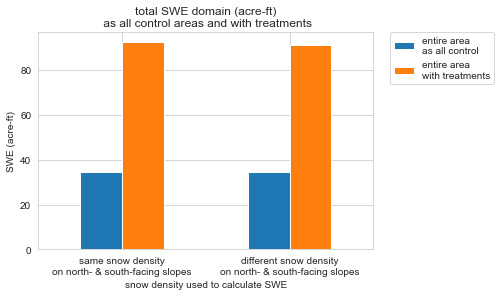

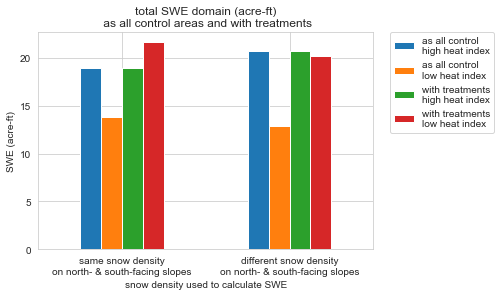

In [146]:
df_full.plot.bar()
# turn the x tick labels horizontal
plt.xticks(rotation=0)
# move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('total SWE domain (acre-ft)\n as all control areas and with treatments')
plt.ylabel('SWE (acre-ft)')

plt.show()
df_sets.plot.bar()
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('total SWE domain (acre-ft)\n as all control areas and with treatments')
plt.ylabel('SWE (acre-ft)')

plt.show()

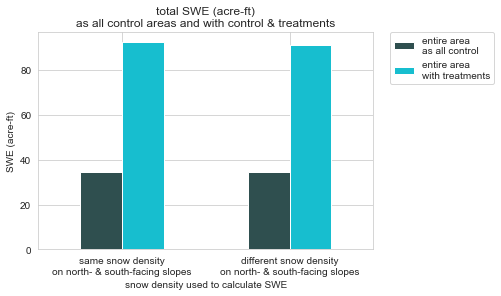

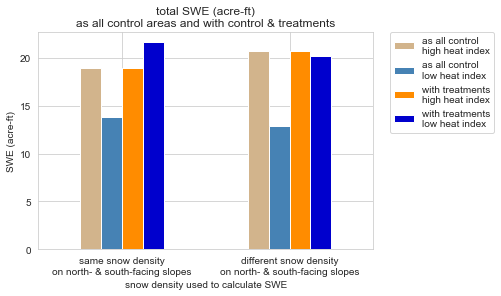

In [152]:
df_full.plot.bar(color=['darkslategrey', 'tab:cyan'])
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('total SWE (acre-ft)\nas all control areas and with control & treatments')
plt.ylabel('SWE (acre-ft)')

plt.show()
df_sets.plot.bar(color=['tan', 'steelblue', 'darkorange', 'mediumblue'])
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('total SWE (acre-ft)\nas all control areas and with control & treatments')
plt.ylabel('SWE (acre-ft)')

plt.show()

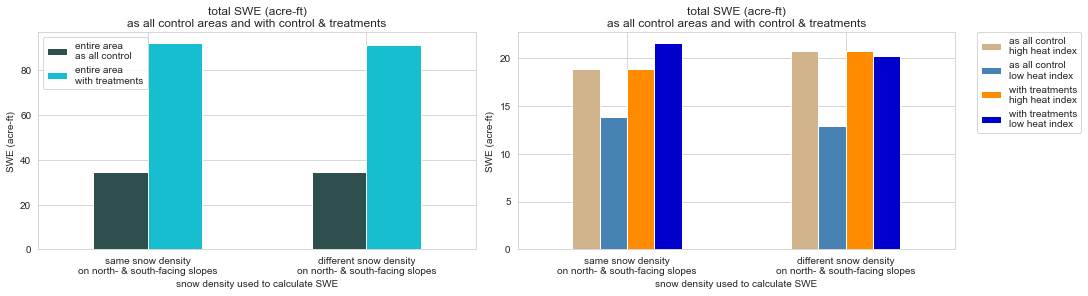

In [185]:
# make these two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 4), constrained_layout=True)

df_full.plot.bar(color=['darkslategrey', 'tab:cyan'], ax=axes[0])
# axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
axes[0].legend(loc='upper left')
axes[0].set_title('total SWE (acre-ft)\nas all control areas and with control & treatments')
axes[0].set_ylabel('SWE (acre-ft)')

df_sets.plot.bar(color=['tan', 'steelblue', 'darkorange', 'mediumblue'], ax=axes[1])
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
axes[1].set_title('total SWE (acre-ft)\nas all control areas and with control & treatments')
axes[1].set_ylabel('SWE (acre-ft)')

labels = ['same snow density\non north- & south-facing slopes', 'different snow density\non north- & south-facing slopes']
axes[0].set_xticklabels(labels=labels, rotation=0)
axes[1].set_xticklabels(labels=labels, rotation=0)

plt.show()

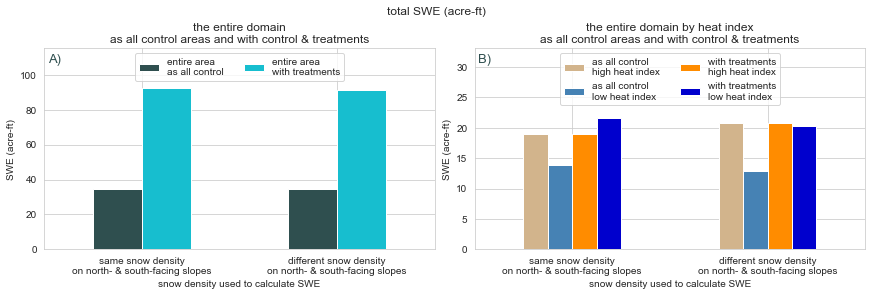

In [233]:
# make these two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

df_full.plot.bar(color=['darkslategrey', 'tab:cyan'], ax=axes[0])
axes[0].set_title('the entire domain\nas all control areas and with control & treatments')
axes[0].set_ylabel('SWE (acre-ft)')
axes[0].legend(loc='upper center', ncol=2)
axes[0].set_ylim([0, 115])

df_sets.plot.bar(color=['tan', 'steelblue', 'darkorange', 'mediumblue'], ax=axes[1])
# axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
axes[1].set_title('the entire domain by heat index\nas all control areas and with control & treatments')
axes[1].set_ylabel('SWE (acre-ft)')
axes[1].legend(loc='upper center', ncol=2)
axes[1].set_ylim([0, 33])

labels = ['same snow density\non north- & south-facing slopes', 'different snow density\non north- & south-facing slopes']
axes[0].set_xticklabels(labels=labels, rotation=0)
axes[1].set_xticklabels(labels=labels, rotation=0)

plt.suptitle('total SWE (acre-ft)')

# add text boxes in the corner of the plots with A) and B) labels 
axes[0].text(0.01, .93, 'A)', transform=axes[0].transAxes, size=13, color='darkslategrey')
axes[1].text(0.01, .93, 'B)', transform=axes[1].transAxes, size=13, color='darkslategrey')

plt.show()

Try to seperate for hue, 

In [148]:
df_full_hue.reset_index(inplace=True)
df_full_hue.drop(columns=['index'], inplace=True)

In [74]:
df_full_hue

,entire area\nas all control,entire area\nwith treatments,density calculation
0,34.4,92.3,same snow density
1,34.5,91.2,variable snow density


<AxesSubplot:>

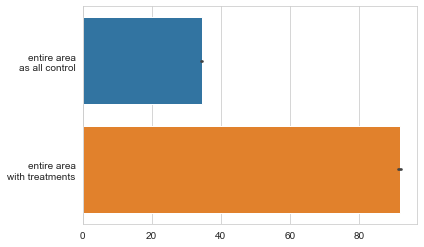

In [75]:
sns.barplot(data=df_full_hue, orient='h')

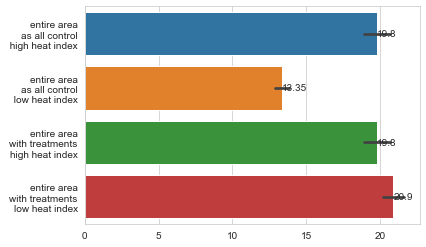

In [85]:
ax = sns.barplot(data=df_sets_hue, orient='h')
ax.bar_label(ax.containers[0], fontsize=10);